Useful links: 
Parse tutorial: https://support.parsebiosciences.com/hc/en-us/articles/360052794312-Scanpy-Tutorial-65k-PBMCs
AnnData tutorial: https://scverse-tutorials.readthedocs.io/en/latest/notebooks/anndata_getting_started.html
scanpy tutorial: https://scanpy.readthedocs.io/en/stable/tutorials/basics/clustering.html

In [ ]:
# ! pip3 install scanpy
# ! pip3 install anndata
# ! pip3 install pooch

In [ ]:
# ! pip3 install scanpy
# ! pip3 install anndata
# ! pip3 install pooch

In [1]:
# Core scverse libraries
import scanpy as sc
import anndata as ad

# Data retrieval 
import pooch

import numpy as np
import pandas as pd
import scipy
import os
import scipy.io as sio
import matplotlib.pyplot as plt

In [2]:
sc.settings.set_figure_params(dpi=50, facecolor="white")

In [3]:
data_path = "/Users/ianschrack/Desktop/parse_analysis_10882-IS/all-sample/DGE_filtered/"

In [4]:
adata = sc.read_mtx(data_path + 'count_matrix.mtx')

# Read in gene & cell data
gene_data = pd.read_csv(data_path + "all_genes.csv")
cell_meta = pd.read_csv(data_path + "cell_metadata.csv")

# Find genes with nan values and filter
gene_data = gene_data[gene_data.gene_name.notnull()]
notNA = gene_data.index
notNA = notNA.to_list()

# Remove genes with nan values and assign gene names
adata = adata[:,notNA]
adata.var = gene_data
adata.var.set_index('gene_name', inplace = True)
adata.var_names_make_unique()

# Add cell meta data to anndata object
adata.obs = cell_meta
adata.obs.set_index('bc_wells', inplace=True)
adata.obs.index.name = None
adata.obs_names_make_unique()

sc.pp.filter_cells(adata, min_genes=300)
sc.pp.filter_genes(adata, min_cells=5)

# Returns the dimensions of the expression matrix (cells, genes)
adata.shape


(49244, 28815)

Add additional Meta Data to the data

In [5]:
sample_annotations = {
    "10882-IS-1": {"tissue": "lung", "Day": "D0", "replicate": "M1"}, 
    "10882-IS-2": {"tissue": "lung", "Day": "D0", "replicate": "M2"},
    "10882-IS-3": {"tissue": "lung", "Day": "D0", "replicate": "M3"},
    "10882-IS-4": {"tissue": "lung", "Day": "D0", "replicate": "M4"},
    "10882-IS-5": {"tissue": "scaffold", "Day": "D0", "replicate": "M1"},
    "10882-IS-6": {"tissue": "scaffold", "Day": "D0", "replicate": "M2"},
    "10882-IS-7": {"tissue": "scaffold", "Day": "D0", "replicate": "M3"},
    "10882-IS-8": {"tissue": "scaffold", "Day": "D0", "replicate": "M4"},
    "10882-IS-9": {"tissue": "blood", "Day": "D0", "replicate": "M1"},
    "10882-IS-10": {"tissue": "blood", "Day": "D0", "replicate": "M2"},
    "10882-IS-11": {"tissue": "blood", "Day": "D0", "replicate": "M3"},
    "10882-IS-12": {"tissue": "blood", "Day": "D0", "replicate": "M4"},
    "10882-IS-13": {"tissue": "lung", "Day": "D7", "replicate": "M1"},
    "10882-IS-14": {"tissue": "lung", "Day": "D7", "replicate": "M2"},
    "10882-IS-15": {"tissue": "lung", "Day": "D7", "replicate": "M3"},
    "10882-IS-16": {"tissue": "lung", "Day": "D7", "replicate": "M4"},
    "10882-IS-17": {"tissue": "scaffold", "Day": "D7", "replicate": "M1"},
    "10882-IS-18": {"tissue": "scaffold", "Day": "D7", "replicate": "M2"},
    "10882-IS-19": {"tissue": "scaffold", "Day": "D7", "replicate": "M3"},
    "10882-IS-20": {"tissue": "scaffold", "Day": "D7", "replicate": "M4"},
    "10882-IS-21": {"tissue": "blood", "Day": "D7", "replicate": "M1"},
    "10882-IS-22": {"tissue": "blood", "Day": "D7", "replicate": "M2"},
    "10882-IS-23": {"tissue": "blood", "Day": "D7", "replicate": "M3"},
    "10882-IS-24": {"tissue": "blood", "Day": "D7", "replicate": "M4"},
    "10882-IS-25": {"tissue": "lung", "Day": "D14", "replicate": "M1"},
    "10882-IS-26": {"tissue": "lung", "Day": "D14", "replicate": "M2"},
    "10882-IS-27": {"tissue": "lung", "Day": "D14", "replicate": "M3"},
    "10882-IS-28": {"tissue": "lung", "Day": "D14", "replicate": "M4"},
    "10882-IS-29": {"tissue": "scaffold", "Day": "D14", "replicate": "M1"},
    "10882-IS-30": {"tissue": "scaffold", "Day": "D14", "replicate": "M2"},
    "10882-IS-31": {"tissue": "scaffold", "Day": "D14", "replicate": "M3"},
    "10882-IS-32": {"tissue": "scaffold", "Day": "D14", "replicate": "M4"},
    "10882-IS-33": {"tissue": "blood", "Day": "D14", "replicate": "M1"},
    "10882-IS-34": {"tissue": "blood", "Day": "D14", "replicate": "M2"},
    "10882-IS-35": {"tissue": "blood", "Day": "D14", "replicate": "M3"},
    "10882-IS-36": {"tissue": "blood", "Day": "D14", "replicate": "M4"},
    "10882-IS-37": {"tissue": "lung", "Day": "D21", "replicate": "M1"},
    "10882-IS-38": {"tissue": "lung", "Day": "D21", "replicate": "M2"},
    "10882-IS-39": {"tissue": "lung", "Day": "D21", "replicate": "M3"},
    "10882-IS-40": {"tissue": "lung", "Day": "D21", "replicate": "M4"},
    "10882-IS-41": {"tissue": "scaffold", "Day": "D21", "replicate": "M1"},
    "10882-IS-42": {"tissue": "scaffold", "Day": "D21", "replicate": "M2"},
    "10882-IS-43": {"tissue": "scaffold", "Day": "D21", "replicate": "M3"},
    "10882-IS-44": {"tissue": "scaffold", "Day": "D21", "replicate": "M4"},
    "10882-IS-45": {"tissue": "blood", "Day": "D21", "replicate": "M1"},
    "10882-IS-46": {"tissue": "blood", "Day": "D21", "replicate": "M2"},
    "10882-IS-47": {"tissue": "blood", "Day": "D21", "replicate": "M3"},
    "10882-IS-48": {"tissue": "blood", "Day": "D21", "replicate": "M4"},
}

for sample, info in sample_annotations.items():
    mask = adata.obs["sample"] == sample
    for key, value in info.items():
        adata.obs.loc[mask, key] = value

In [6]:
adata.obs

,sample,species,gene_count,tscp_count,mread_count,bc1_wind,bc2_wind,bc3_wind,bc1_well,bc2_well,bc3_well,n_genes,tissue,Day,replicate
01_01_30__s1,10882-IS-1,GRCm39-tdTomato,1048,5775,33480,1,1,30,A1,A1,C6,1048,lung,D0,M1
01_01_40__s1,10882-IS-1,GRCm39-tdTomato,452,2002,10297,1,1,40,A1,A1,D4,452,lung,D0,M1
01_01_64__s1,10882-IS-1,GRCm39-tdTomato,1224,3139,19892,1,1,64,A1,A1,F4,1224,lung,D0,M1
01_02_38__s1,10882-IS-1,GRCm39-tdTomato,1468,7766,45401,1,2,38,A1,A2,D2,1468,lung,D0,M1
01_03_33__s1,10882-IS-1,GRCm39-tdTomato,1067,4959,28643,1,3,33,A1,A3,C9,1067,lung,D0,M1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
09_92_40__s8,10882-IS-9,GRCm39-tdTomato,833,2174,13369,9,92,40,A9,H8,D4,833,blood,D0,M1
09_95_57__s8,10882-IS-9,GRCm39-tdTomato,1146,2721,17384,9,95,57,A9,H11,E9,1146,blood,D0,M1
09_95_65__s8,10882-IS-9,GRCm39-tdTomato,604,916,6503,9,95,65,A9,H11,F5,604,blood,D0,M1
09_96_43__s8,10882-IS-9,GRCm39-tdTomato,1894,5688,34481,9,96,43,A9,H12,D7,1894,blood,D0,M1


In [7]:

# Quality control
# Calculate and add mitochondrial DNA
adata.var['mt'] = adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)



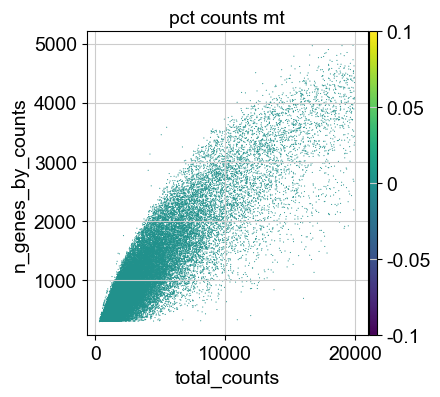

In [18]:
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

Plot QC Metrics for All Tissues Grouped by Day

(0.0, 20000.0)

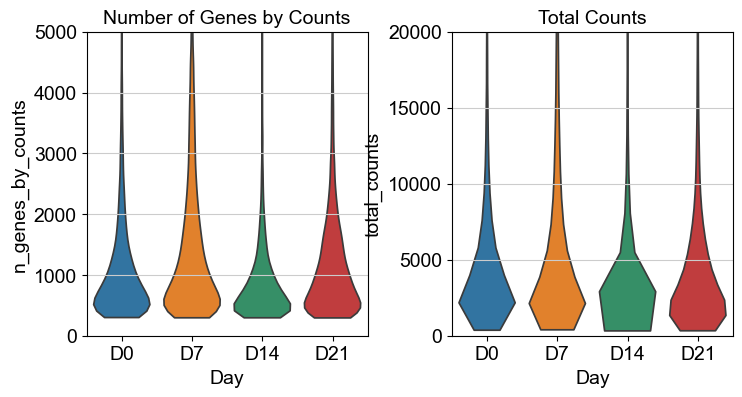

In [11]:
# Create the multi-panel violin plot
sc.pl.violin(
    adata,
    keys=['n_genes_by_counts', 'total_counts'],
    groupby='Day',
    jitter=0.4,
    multi_panel=True,
    size=0,
    show=False
)

# Access current figure and modify subplot titles
axes = plt.gcf().axes
axes[0].set_title("Number of Genes by Counts")
axes[0].set_ylim([0, 5000])
axes[1].set_title("Total Counts")
axes[1].set_ylim([0, 20000])


Plot QC Metrics for All Tissues Grouped by Tissue

(0.0, 20000.0)

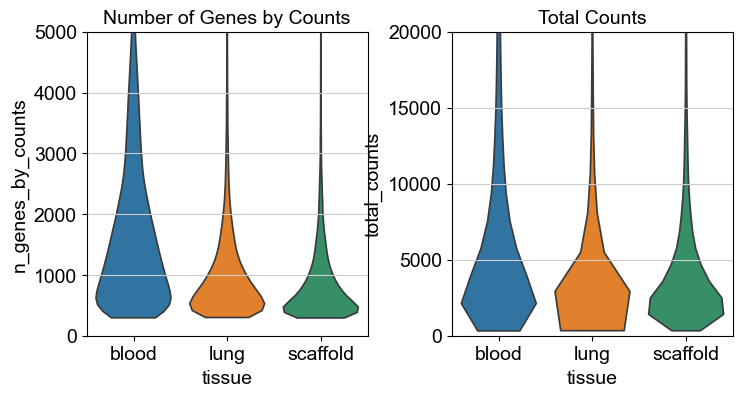

In [12]:
# Create the multi-panel violin plot
sc.pl.violin(
    adata,
    keys=['n_genes_by_counts', 'total_counts'],
    groupby='tissue',
    jitter=0.4,
    multi_panel=True,
    size=0,
    show=False
)

# Access current figure and modify subplot titles
axes = plt.gcf().axes
axes[0].set_title("Number of Genes by Counts")
axes[0].set_ylim([0, 5000])
axes[1].set_title("Total Counts")
axes[1].set_ylim([0, 20000])


Plot QC Metrics for Lung Cells Grouped by Day

(0.0, 20000.0)

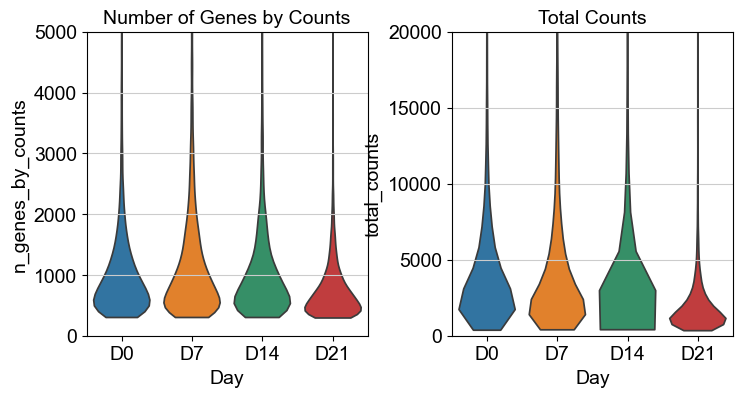

In [13]:
# Create the multi-panel violin plot
sc.pl.violin(
    adata[adata.obs["tissue"] == "lung"].copy(),
    keys=['n_genes_by_counts', 'total_counts'],
    groupby='Day',
    jitter=0.4,
    multi_panel=True,
    size=0,
    show=False
)

# Access current figure and modify subplot titles
axes = plt.gcf().axes
axes[0].set_title("Number of Genes by Counts")
axes[0].set_ylim([0, 5000])
axes[1].set_title("Total Counts")
axes[1].set_ylim([0, 20000])

Plot QC Metrics for Scaffold Cells Grouped by Day

(0.0, 20000.0)

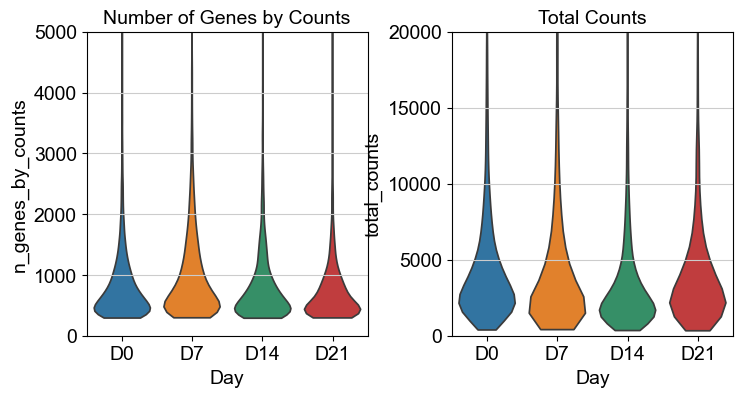

In [15]:
# Create the multi-panel violin plot
sc.pl.violin(
    adata[adata.obs["tissue"] == "scaffold"].copy(),
    keys=['n_genes_by_counts', 'total_counts'],
    groupby='Day',
    jitter=0.4,
    multi_panel=True,
    size=0,
    show=False
)

# Access current figure and modify subplot titles
axes = plt.gcf().axes
axes[0].set_title("Number of Genes by Counts")
axes[0].set_ylim([0, 5000])
axes[1].set_title("Total Counts")
axes[1].set_ylim([0, 20000])

Plot QC Metrics for Blood Cells Grouped by Day

(0.0, 20000.0)

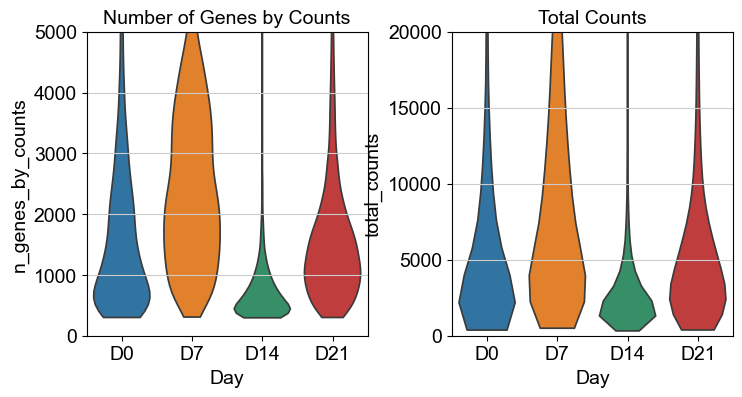

In [16]:
# Create the multi-panel violin plot
sc.pl.violin(
    adata[adata.obs["tissue"] == "blood"].copy(),
    keys=['n_genes_by_counts', 'total_counts'],
    groupby='Day',
    jitter=0.4,
    multi_panel=True,
    size=0,
    show=False
)

# Access current figure and modify subplot titles
axes = plt.gcf().axes
axes[0].set_title("Number of Genes by Counts")
axes[0].set_ylim([0, 5000])
axes[1].set_title("Total Counts")
axes[1].set_ylim([0, 20000])

In [17]:
# Filter the data
adata = adata[adata.obs.n_genes_by_counts < 5000,:]
adata = adata[adata.obs.total_counts < 20000,:]
adata = adata[adata.obs.pct_counts_mt < 15,:]
adata.shape # Checking number of cells remaining

(47873, 28815)

# Feature Selection

In [19]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000, batch_key="sample")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/sparse/_data.py:144: RuntimeWarning: overflow encountered in expm1
  result = op(self._deduped_data())
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:297: RuntimeWarning: overflow encountered in expm1
  X = np.expm1(X)


ValueError: cannot specify integer `bins` when input data contains infinity